载入数据

In [1]:
import json

# 打开JSON文件并加载数据
with open('p1560L.json', 'r') as file:
    data = json.load(file)

# 提取 "label" 字段到一个列表
label = data["label"]

数据定义

In [2]:
#以下的数字代表是这个点的x坐标序号，+1 为y坐标序号 
# 0-21   index = 2 * num + 1
WRIST = 1 # 腕部关键点  
THUMB_TIP = 9 #大拇指顶点
INDEX_FINGER_TIP = 17 #食指顶点
MIDDLE_FINGER_TIP = 25 #中指顶点
RING_FINGER_TIP = 33 #无名指顶点
PINKY_TIP = 41#小指顶点

'''
WT  大拇指 ——> 腕部
WI  食指
WM  中指
WR  无名指
WP  小指
'''

WT=[]
WI = []
WM = []
WR = []
WP = []

计算局部最大值和最小值

In [3]:
def find_local_extremes(numbers):
    if len(numbers) < 3:
        return "输入的数字串过短，无法找到局部最大值和最小值"

    extremes = []
    transitions = []  # 记录时间变化点

    for i in range(1, len(numbers) - 1):
        if numbers[i] >= numbers[i - 1] and numbers[i] >= numbers[i + 1] and numbers[i - 1] != numbers[i + 1]:
            extremes.append((i, numbers[i], "最高点"))
        elif numbers[i] <= numbers[i - 1] and numbers[i] <= numbers[i + 1] and numbers[i - 1] != numbers[i + 1]:
            extremes.append((i, numbers[i], "最低点"))
        elif numbers[i - 1] == numbers[i + 1]:
            print("重复")
    
    if len(extremes) == 0:
        return "没有找到局部最大值和最小值"

    # 记录时间变化点
    for i in range(1, len(extremes)):
        if extremes[i][2] == "最高点" and extremes[i-1][2] == "最低点":
            transitions.append((extremes[i-1][0], extremes[i][0], "升为最高点", ))
        elif extremes[i][2] == "最低点" and extremes[i-1][2] == "最高点":
            transitions.append((extremes[i-1][0], extremes[i][0], "降为最低点"))

    return extremes, transitions



计算抓伸周期

In [4]:
def calculate_transition_times(transitions):
    high_to_low_times = []
    low_to_high_times = []

    for i in range(1, len(transitions)):
        if transitions[i][2] == "降为最低点" :
            high_to_low_time = transitions[i][1] - transitions[i][0]
            high_to_low_times.append(high_to_low_time)
        elif transitions[i][2] == "升为最高点" :
            low_to_high_time = transitions[i][1] - transitions[i][0]
            low_to_high_times.append(low_to_high_time)

    return high_to_low_times, low_to_high_times

计算2、3、4、5指相对于腕部关键点的距离

In [5]:
import math


for line in label:
    x1, y1 = line[1], line[2]
    coordinates = [(line[i], line[i + 1]) for i in range(9, 42, 8)]

    distances = [math.sqrt((x - x1) ** 2 + (y - y1) ** 2) for x, y in coordinates]

    wt_distance, wi_distance, wm_distance, wr_distance, wp_distance = distances

    WT.append(wt_distance)
    WI.append(wi_distance)
    WM.append(wm_distance)
    WR.append(wr_distance)
    WP.append(wp_distance)

print(len(WT))
print(len(WI))


249
249


In [6]:
def get_results(data):
    extremes, transitions = find_local_extremes(data)
    high_to_low_times, low_to_high_times = calculate_transition_times(transitions)
    return extremes, transitions, high_to_low_times, low_to_high_times


In [205]:
wt_extremes, wt_transitions, wt_high_to_low_times, wt_low_to_high_times = get_results(WT)
wi_extremes, wi_transitions, wi_high_to_low_times, wi_low_to_high_times = get_results(WI)
wm_extremes, wm_transitions, wm_high_to_low_times, wm_low_to_high_times = get_results(WM)
wr_extremes, wr_transitions, wr_high_to_low_times, wr_low_to_high_times = get_results(WR)
wp_extremes, wp_transitions, wp_high_to_low_times, wp_low_to_high_times = get_results(WP)


重复
重复
重复
重复


In [206]:
from tabulate import  tabulate

wt_info = ['WT', max(wt_high_to_low_times), min(wt_high_to_low_times), sum(wt_high_to_low_times) / len(wt_high_to_low_times), max(wt_low_to_high_times), min(wt_low_to_high_times),sum(wt_low_to_high_times) / len(wt_low_to_high_times)]
wi_info = ['WI', max(wi_high_to_low_times), min(wi_high_to_low_times), sum(wi_high_to_low_times) / len(wi_high_to_low_times), max(wi_low_to_high_times), min(wi_low_to_high_times),sum(wi_low_to_high_times) / len(wi_low_to_high_times)]
wm_info = ['WM', max(wm_high_to_low_times), min(wm_high_to_low_times), sum(wm_high_to_low_times) / len(wm_high_to_low_times), max(wm_low_to_high_times), min(wm_low_to_high_times),sum(wm_low_to_high_times) / len(wm_low_to_high_times)]
wr_info = ['WR', max(wr_high_to_low_times), min(wr_high_to_low_times), sum(wr_high_to_low_times) / len(wr_high_to_low_times), max(wr_low_to_high_times), min(wr_low_to_high_times),sum(wr_low_to_high_times) / len(wr_low_to_high_times)]
wp_info = ['WP', max(wp_high_to_low_times), min(wp_high_to_low_times), sum(wp_high_to_low_times) / len(wp_high_to_low_times), max(wp_low_to_high_times), min(wp_low_to_high_times),sum(wp_low_to_high_times) / len(wp_low_to_high_times)]

table_header = ['name', 'high_to_low_time: max_time', 'min_time', 'avg_time',  'low_to_high_time: max_time', 'min_time', 'avg_time']
table_data =[wt_info, wi_info, wm_info, wr_info, wp_info]

In [207]:
print(tabulate(table_data, headers=table_header, tablefmt='fancy_grid'))

╒════════╤══════════════════════════════╤════════════╤════════════╤══════════════════════════════╤════════════╤════════════╕
│ name   │   high_to_low_time: max_time │   min_time │   avg_time │   low_to_high_time: max_time │   min_time │   avg_time │
╞════════╪══════════════════════════════╪════════════╪════════════╪══════════════════════════════╪════════════╪════════════╡
│ WT     │                            7 │          1 │    2.55263 │                            9 │          1 │    3.53846 │
├────────┼──────────────────────────────┼────────────┼────────────┼──────────────────────────────┼────────────┼────────────┤
│ WI     │                            7 │          1 │    2.69444 │                           12 │          1 │    4       │
├────────┼──────────────────────────────┼────────────┼────────────┼──────────────────────────────┼────────────┼────────────┤
│ WM     │                            7 │          1 │    2.68421 │                           10 │          1 │    3.68421 │


In [208]:
print(len(WI))

249


In [209]:
print(len(label))

249


In [210]:
WI = WI[:250]
WM = WM[:250]
WR = WR[:250]
WP = WP[:250]

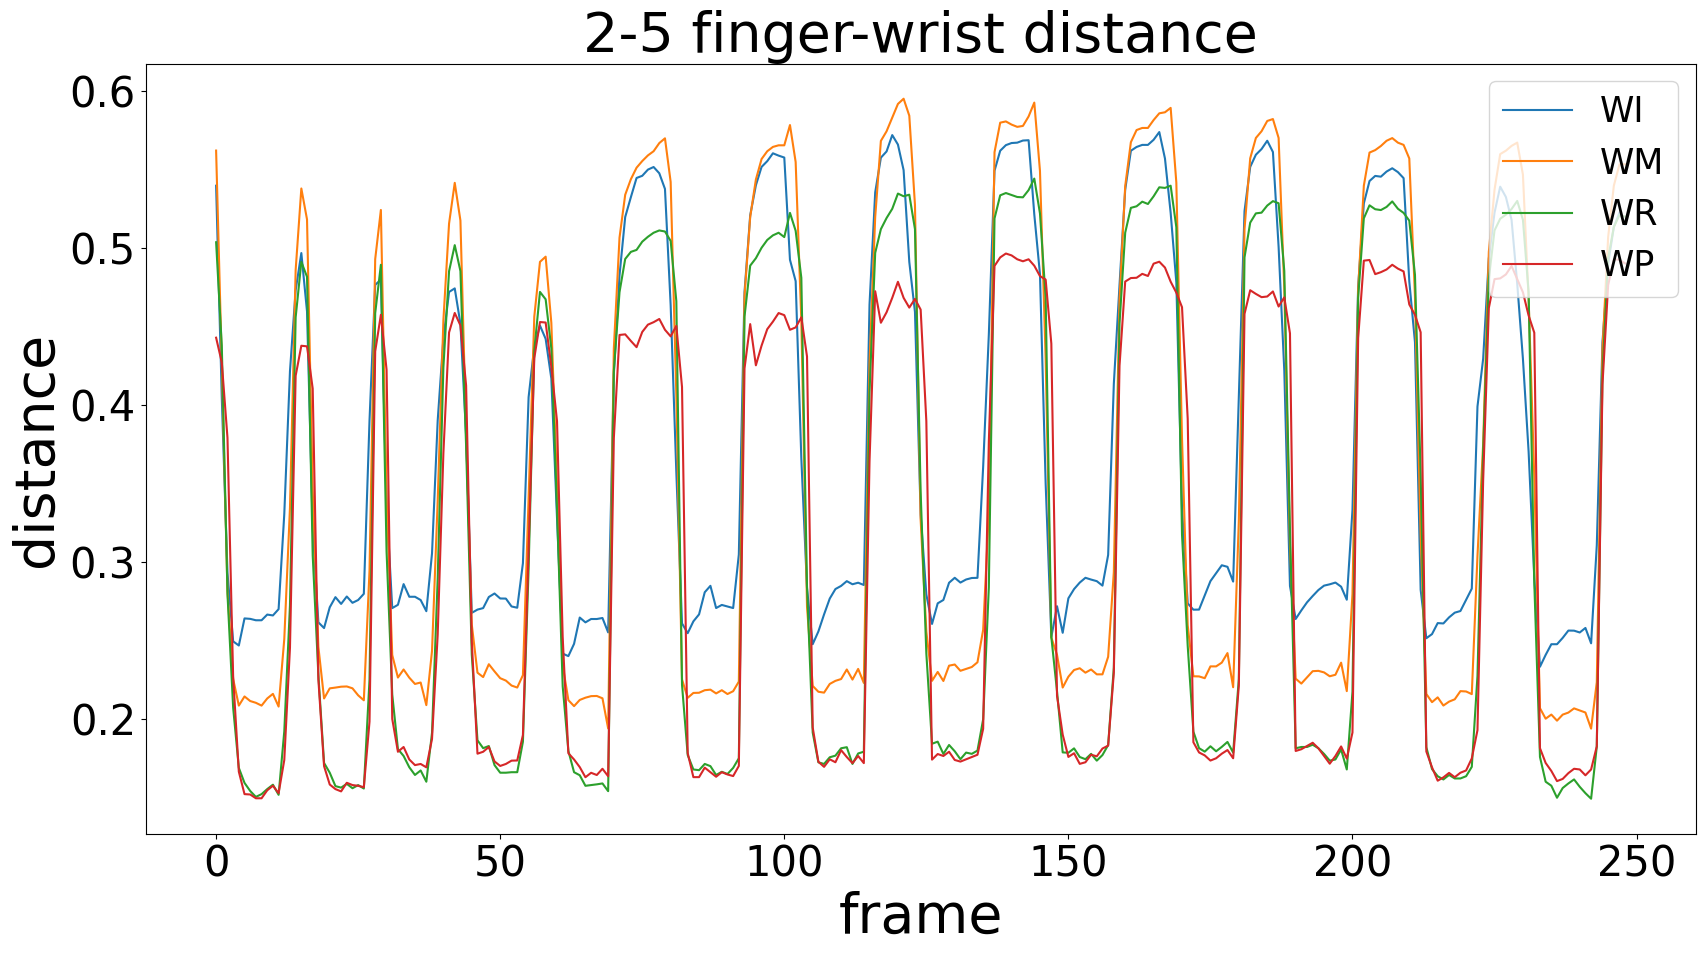

In [211]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.figure(figsize=(20, 10))

#plt.plot(WT, label="WT")
plt.plot(WI, label="WI")
plt.plot(WM, label="WM")
plt.plot(WR, label="WR")
plt.plot(WP, label="WP")
# 添加图例
plt.legend(loc='upper right',prop = {'size':25})

# 添加标签和标题
plt.xlabel('frame', fontdict={'weight':'normal','size': 40})
plt.ylabel('distance', fontdict={'weight':'normal','size': 40})
plt.title('2-5 finger-wrist distance', fontdict={'weight':'normal','size': 40})

x_major_locator=MultipleLocator(50)
#把x轴的刻度间隔设置为50，并存在变量里
y_major_locator=MultipleLocator(0.1)
#把y轴的刻度间隔设置为0.1，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)

ax.yaxis.set_major_locator(y_major_locator)

plt.tick_params(labelsize=30)
plt.show()

2指、5指根部关键点与手腕关键点所围成的面积

In [212]:
area_list = []
for line in label :
    x1, y1 = line[1], line[2]   #腕部关键点坐标
    x2, y2 = line[17], line[18]
    x3, y3 = line[41], line[42]
    area = 0.5 * abs(x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
    area_list.append(area)


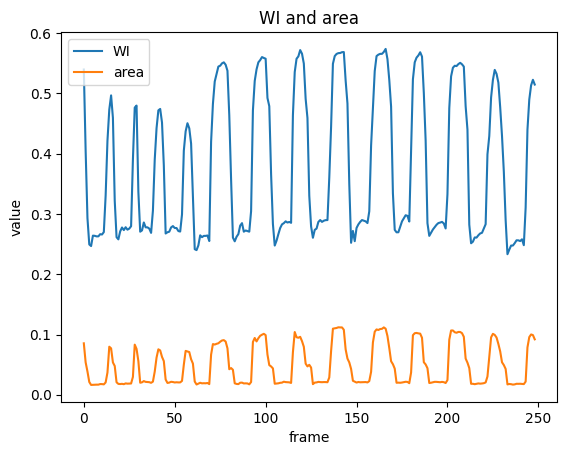

In [213]:
import matplotlib.pyplot as plt



plt.plot(WI, label="WI")
plt.plot(area_list, label="area")

# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('frame')
plt.ylabel('value')
plt.title('WI and area')
 
# 显示图形
plt.show()

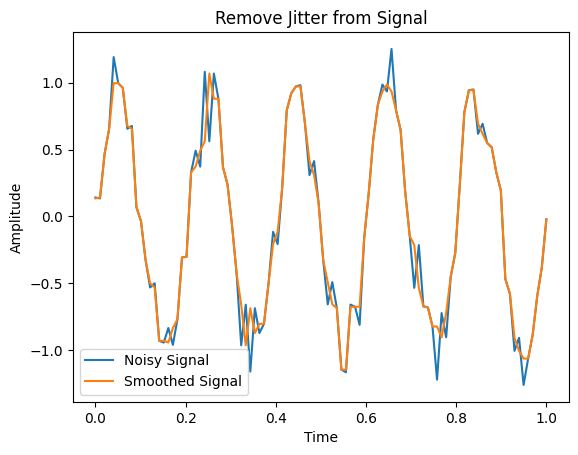

In [214]:
import numpy as np
from scipy.signal import medfilt

def remove_jitter(signal, window_size=3):
    # 使用中值滤波器平滑信号
    smoothed_signal = medfilt(signal, kernel_size=window_size)
    return smoothed_signal

# 示例
if __name__ == "__main__":
    # 生成带抖动的示例波形
    t = np.linspace(0, 1, 100)
    noisy_signal = np.sin(2 * np.pi * 5 * t) + 0.2 * np.random.randn(100)

    # 消除抖动
    smoothed_signal = remove_jitter(noisy_signal)

    # 绘制原始波形和平滑后的波形
    import matplotlib.pyplot as plt

    plt.plot(t, noisy_signal, label='Noisy Signal')
    plt.plot(t, smoothed_signal, label='Smoothed Signal')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Remove Jitter from Signal')
    plt.show()


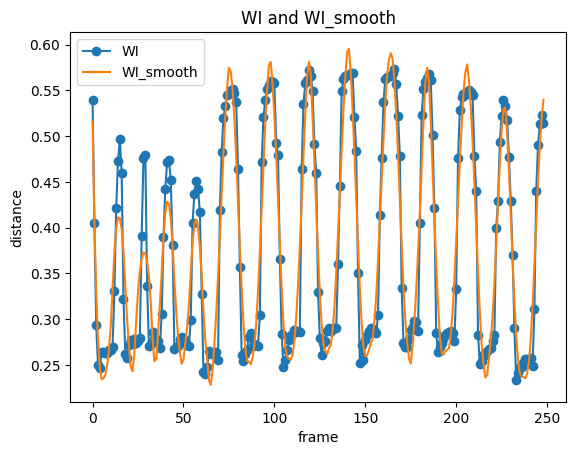

In [215]:
import matplotlib.pyplot as plt
import scipy
# 创建两个示例列表
#WI = [1, 2, 3, 4, 5]
#WM = [5, 4, 3, 2, 1]

#tmp = [wi - wm for wi, wm in zip(WI, WM)]

#tmp_smooth = scipy.signal.savgol_filter(tmp,11,3)

WI_smooth = scipy.signal.savgol_filter(WI,13,3)

# 绘制曲线
plt.plot(WI, label='WI', marker='o')  # 绘制WT列表的曲线，使用圆点标记
#plt.plot(WM, label='WM', marker='s')  # 绘制WM列表的曲线，使用正方形标记
#plt.plot(tmp, label='tmp(WI - WM)', linestyle='--', marker='^')
#plt.plot(tmp_smooth, label='tmp_smooth', marker='.')
plt.plot(WI_smooth, label='WI_smooth')

# 添加图例
plt.legend()

# 添加标题和标签
plt.title('WI and WI_smooth')
plt.xlabel('frame')
plt.ylabel('distance')

# 显示图形
plt.show()

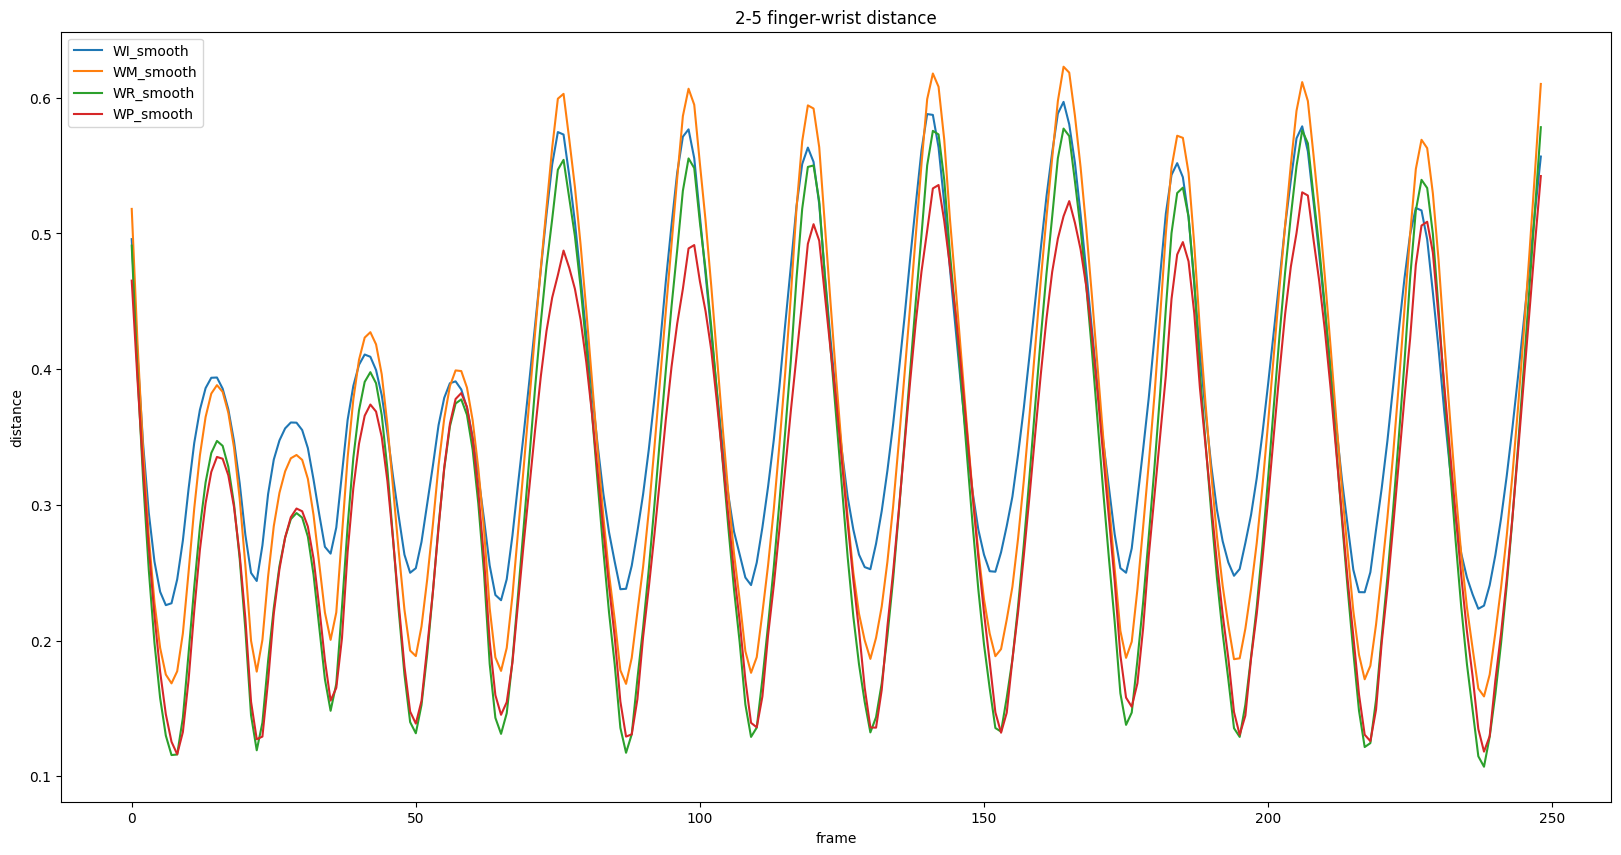

In [216]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

plt.figure(figsize=(20, 10))

WI_smooth = scipy.signal.savgol_filter(WI,15,3)
WM_smooth = scipy.signal.savgol_filter(WM,15,3)
WR_smooth = scipy.signal.savgol_filter(WR,15,3)
WP_smooth = scipy.signal.savgol_filter(WP,15,3)
#plt.plot(WT, label="WT")
#plt.plot(WI, label="WI")
plt.plot(WI_smooth,label="WI_smooth")
#plt.plot(WM, label="WM")
plt.plot(WM_smooth, label="WM_smooth")
#plt.plot(WR, label="WR")
plt.plot(WR_smooth, label="WR_smooth")
#plt.plot(WP, label="WP")
plt.plot(WP_smooth, label="WP_smooth")
# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('frame')
plt.ylabel('distance')
plt.title('2-5 finger-wrist distance')

#x_major_locator=MultipleLocator(50)
#把x轴的刻度间隔设置为50，并存在变量里
#y_major_locator=MultipleLocator(0.1)
#把y轴的刻度间隔设置为0.1，并存在变量里
#ax=plt.gca()
#ax为两条坐标轴的实例
#ax.xaxis.set_major_locator(x_major_locator)

#ax.yaxis.set_major_locator(y_major_locator)

plt.show()

In [217]:
print(wi_smooth_extremes)
print(len(wi_smooth_extremes))

NameError: name 'wi_smooth_extremes' is not defined

In [ ]:
print(len(WI_smooth))
print(len(WM_smooth))

250
250


In [ ]:
wi_smooth_extremes, wi_smooth_transitions, wi_smooth_high_to_low_times, wi_smooth_low_to_high_times = get_results(WI_smooth)
wm_smooth_extremes, wm_smooth_transitions, wm_smooth_high_to_low_times, wm_smooth_low_to_high_times = get_results(WM_smooth)
wr_smooth_extremes, wr_smooth_transitions, wr_smooth_high_to_low_times, wr_smooth_low_to_high_times = get_results(WR_smooth)
wp_smooth_extremes, wp_smooth_transitions, wp_smooth_high_to_low_times, wp_smooth_low_to_high_times = get_results(WP_smooth)


In [ ]:
def calculate_time_differences(curve1_transitions, curve2_transitions):
    # 初始化变量
    start_differences = []
    end_differences = []

    # 遍历每个周期
    for i in range(min(len(curve1_transitions), len(curve2_transitions))):
        # 找到两条曲线的第一个极值点的帧数
        start_frame_curve1 = curve1_transitions[i][0]
        start_frame_curve2 = curve2_transitions[i][0]

        # 找到两条曲线的最后一个极值点的帧数
        end_frame_curve1 = curve1_transitions[i][1]
        end_frame_curve2 = curve2_transitions[i][1]
        

        # 计算启动时间差和结束时间差，并添加到列表中
        if i % 2 == 0 :
            start_differences.append(start_frame_curve2 - start_frame_curve1)
        else:
            end_differences.append(end_frame_curve2 - end_frame_curve1)

    return start_differences, end_differences

# 例子：两条曲线的局部极值点信息（假设有多个周期）
''' wi_smooth_transitions = [
    [(0, 10, "升为最高点"), (10, 15, "降为最低点"), (20, 30, "升为最高点")],
    # ... 其他周期的极值点信息
]

wm_smooth_transitions = [
    [(5, 15, "升为最高点"), (15, 20, "降为最低点"), (25, 35, "升为最高点")],
    # ... 其他周期的极值点信息
] '''

# 计算时间差
start_differences, end_differences = calculate_time_differences(wi_smooth_transitions, wm_smooth_transitions)

# 打印结果
for i in range(len(start_differences)):
    print(f"第{i + 1}周期启动时间差: {start_differences[i]} 帧")
    print(f"第{i + 1}周期结束时间差: {end_differences[i]} 帧")


第1周期启动时间差: 0 帧
第1周期结束时间差: 0 帧
第2周期启动时间差: 0 帧
第2周期结束时间差: -1 帧
第3周期启动时间差: -1 帧
第3周期结束时间差: 0 帧
第4周期启动时间差: 0 帧
第4周期结束时间差: 0 帧
第5周期启动时间差: 0 帧
第5周期结束时间差: 0 帧
第6周期启动时间差: 0 帧
第6周期结束时间差: 0 帧
第7周期启动时间差: 0 帧
第7周期结束时间差: 0 帧
第8周期启动时间差: 0 帧
第8周期结束时间差: 0 帧
第9周期启动时间差: 0 帧
第9周期结束时间差: -1 帧
第10周期启动时间差: -1 帧
第10周期结束时间差: 2 帧
第11周期启动时间差: 2 帧
第11周期结束时间差: 4 帧
第12周期启动时间差: 4 帧
第12周期结束时间差: 4 帧
第13周期启动时间差: 4 帧
第13周期结束时间差: 6 帧
第14周期启动时间差: 6 帧
第14周期结束时间差: 8 帧
第15周期启动时间差: 8 帧
第15周期结束时间差: 7 帧
第16周期启动时间差: 7 帧
第16周期结束时间差: 7 帧
第17周期启动时间差: 7 帧
第17周期结束时间差: 8 帧
第18周期启动时间差: 8 帧
第18周期结束时间差: 7 帧
第19周期启动时间差: 7 帧
第19周期结束时间差: 8 帧
第20周期启动时间差: 8 帧
第20周期结束时间差: 13 帧
第21周期启动时间差: 13 帧
第21周期结束时间差: 20 帧
第22周期启动时间差: 20 帧
第22周期结束时间差: 21 帧
第23周期启动时间差: 21 帧
第23周期结束时间差: 19 帧
第24周期启动时间差: 19 帧
第24周期结束时间差: 21 帧
第25周期启动时间差: 21 帧
第25周期结束时间差: 23 帧
第26周期启动时间差: 23 帧
第26周期结束时间差: 16 帧
第27周期启动时间差: 16 帧
第27周期结束时间差: 23 帧
第28周期启动时间差: 23 帧
第28周期结束时间差: 30 帧
第29周期启动时间差: 30 帧
第29周期结束时间差: 35 帧


In [ ]:
print(wi_smooth_transitions[1][0])

11


In [ ]:
for list in wi_smooth_transitions:
    print(list)

(7, 11, '升为最高点')
(11, 14, '降为最低点')
(14, 18, '升为最高点')
(18, 22, '降为最低点')
(22, 25, '升为最高点')
(25, 29, '降为最低点')
(29, 32, '升为最高点')
(32, 35, '降为最低点')
(35, 39, '升为最高点')
(39, 43, '降为最低点')
(43, 46, '升为最高点')
(46, 49, '降为最低点')
(49, 52, '升为最高点')
(52, 56, '降为最低点')
(56, 60, '升为最高点')
(60, 63, '降为最低点')
(63, 66, '升为最高点')
(66, 70, '降为最低点')
(70, 73, '升为最高点')
(73, 77, '降为最低点')
(77, 78, '升为最高点')
(78, 79, '降为最低点')
(79, 81, '升为最高点')
(81, 83, '降为最低点')
(83, 86, '升为最高点')
(86, 87, '降为最低点')
(87, 89, '升为最高点')
(89, 93, '降为最低点')
(93, 97, '升为最高点')
(97, 101, '降为最低点')
(101, 103, '升为最高点')
(103, 108, '降为最低点')
(108, 113, '升为最高点')
(113, 115, '降为最低点')
(115, 118, '升为最高点')
(118, 123, '降为最低点')
(123, 127, '升为最高点')
(127, 130, '降为最低点')
(130, 134, '升为最高点')
(134, 138, '降为最低点')
(138, 140, '升为最高点')
(140, 141, '降为最低点')
(141, 147, '升为最高点')
(147, 151, '降为最低点')
(151, 156, '升为最高点')
(156, 161, '降为最低点')
(161, 165, '升为最高点')
(165, 171, '降为最低点')
(171, 175, '升为最高点')
(175, 180, '降为最低点')
(180, 188, '升为最高点')
(188, 192, '降为最低点')
(192, 199, '升为最高点')
